In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<ipython-input-2-6249e89c169f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

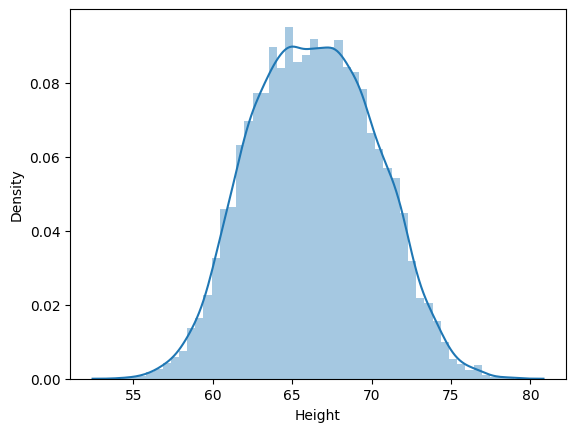

In [2]:
import seaborn as sns
sns.distplot(df['Height'])

In [3]:
'''
it is normal only but for the sake of demonstration, i am doing the percentile method
'''
df['Height'].skew()

np.float64(0.04936908937689031)

<Axes: ylabel='Height'>

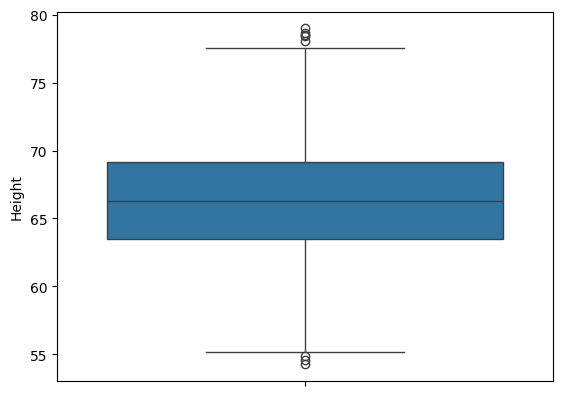

In [4]:
sns.boxplot(df['Height'])

###Detection

In [9]:
'''
percentiles are the threshold which we set ourselves.
'''
max_lim = df['Height'].quantile(0.99)
min_lim = df['Height'].quantile(0.01)

df[(df['Height']>max_lim) | (df['Height']<min_lim)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


###Trimming

In [6]:
new_df = df[(df['Height']<max_lim) & (df['Height']>min_lim)]

In [8]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


###Capping

In [10]:
df['Height'] = np.where(
    df['Height']>max_lim,
    max_lim,
    np.where(
        df['Height']<min_lim,
        min_lim,
        df['Height']
    )
)

<Axes: ylabel='Height'>

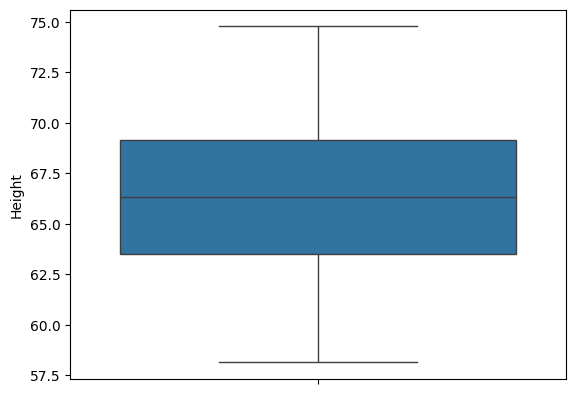

In [11]:
#as you can see, outliers eliminated.
sns.boxplot(df['Height'])